https://github.com/kgourgou/Linear-Perceptron/blob/master/Perceptron-Algorithm.ipynb

El perceptron es un clasificador lineal simple, que separa conjuntos de datos de acuerdo a sus propiedades o _features_.  El objetivo es hallar el hiperplano que separa los dos conjuntos de puntos de acuerdo a sus features.  Una vez que se tiene el hiperplano (se hizo el entrenamiento), se puede decidir sobre la clase a la que pertenecen nuevas observaciones.

In [51]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

# Size matters in plots.
pl.rcParams['figure.figsize'] = (8.0, 6.0)

# Plotting with style! 
import seaborn as sb

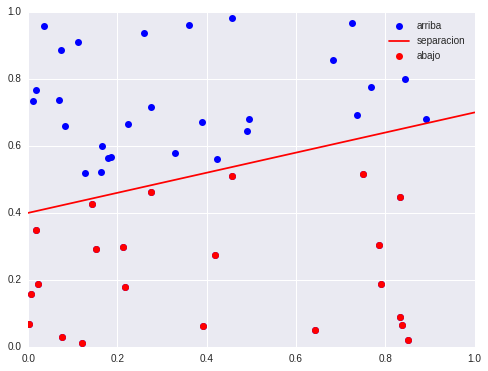

In [52]:
# Generar puntos en R^2
N = 50
xn = nr.rand(N,2)
x = np.linspace(0,1);

# definir una linea de corte de clases:
a = 0.3
b = 0.4
f = lambda x : a*x + b;

fig =pl.figure()
figa = pl.gca();

plt.plot(xn[:,0],xn[:,1],'bo');
plt.plot(x,f(x),'r')

# separar los puntos por clase
yn = np.zeros([N,1]);

for i in xrange(N):
    if(f(xn[i,0])>xn[i,1]):
        # abajo de la linea
        yn[i] = 1;
        plt.plot(xn[i,0],xn[i,1],'ro')
    else:
        # arriba de la linea
        yn[i] = -1;
                
plt.legend(['arriba','separacion','abajo'],loc=0)
plt.xlim([0., 1.])
plt.ylim([0., 1.])
plt.show()

A very simple implementation of the perceptron algorithm for two dimensional data.        
Given points (x,y) with x in R^{2} and y in {0,1}, the perceptron learning algorithm searches for the best
line that separates the data points according to the difference classes defined in y.         

Input: 
 xn : Data points, an Nx2 vector. 
 yn : Classification of the previous data points, an Nx1 vector. 
 MaxIter : Maximum number of iterations (optional).
 w  : Initial vector of parameters (optional).            

Output:  w : Parameters of the best line, y = ax+b, that linearly separates the data.         

Note: Convergence will be slower than expected, since this implementation picks points
to update without a specific plan (randomly). This is enough for a demonstration, not so good for actual work.  

In [59]:
def perceptron(xn,yn,MaxIter=1000,w=np.zeros(3)):
    
    N = xn.shape[0];
    
    # separar la curva:
    f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1]);

    for _ in xrange(MaxIter):
        i = nr.randint(N);
        if(yn[i] != f(xn[i,:])): # If not classified correctly, adjust the line to account for that point.
             w[0] = w[0] + yn[i];
             w[1] = w[1] + yn[i]*xn[i,0];
             w[2] = w[2] + yn[i]*xn[i,1];            
    return w;

In [60]:
w = perceptron(xn,yn)
w

array([ 2.        ,  0.59000193, -4.02352614])

(0.0, 1.0)

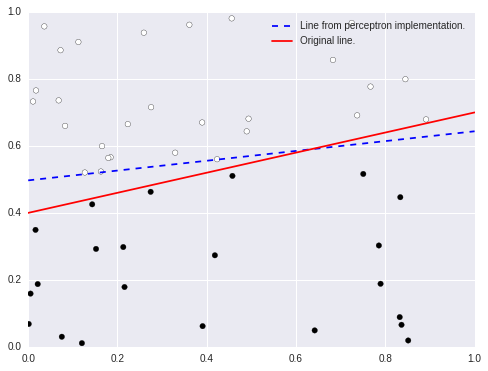

In [61]:
bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

sep_color = (yn+1)/2.0;

pl.figure();
figa = pl.gca()

pl.scatter(xn[:,0],xn[:,1],c=sep_color, s=30)
pl.plot(x,y(x),'b--',label='Line from perceptron implementation.')
pl.plot(x,f(x),'r',label='Original line.')
pl.legend()
plt.xlim([0., 1.]); plt.ylim([0., 1.])